# Scratch

## 1. Gates and their Plotting

AND Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


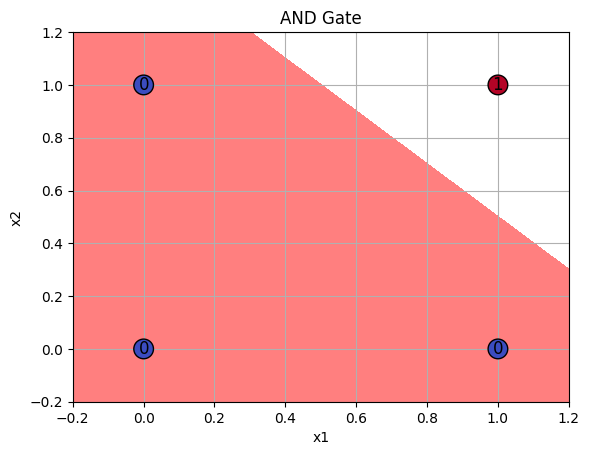

OR Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


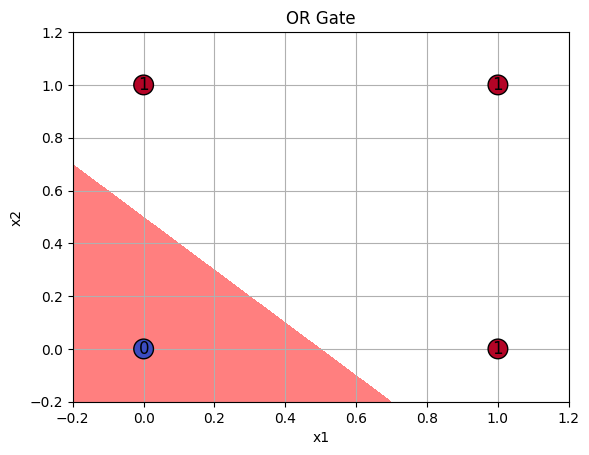

NAND Gate:
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 0


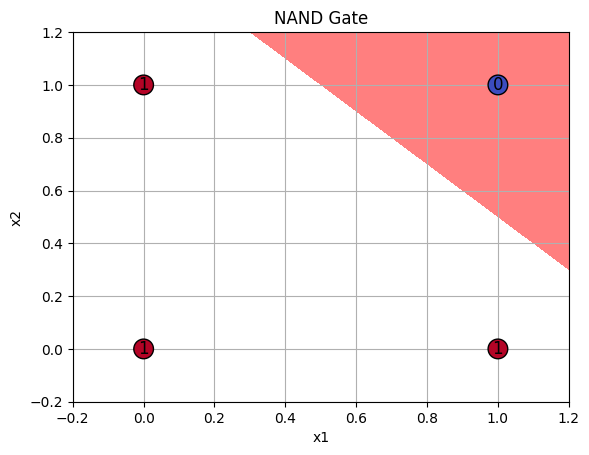

NOR Gate:
Input: [0 0], Output: 1
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 0


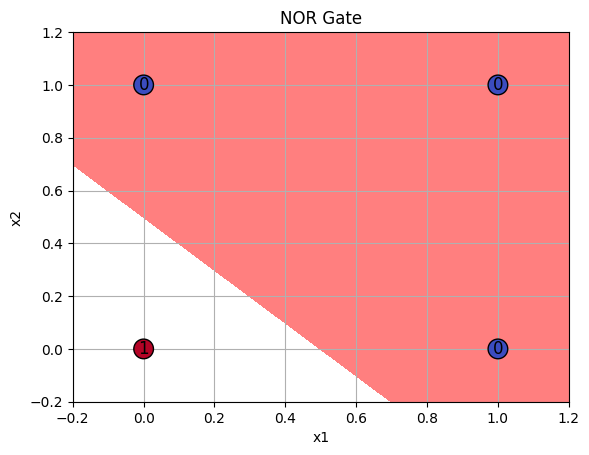

XOR Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 0


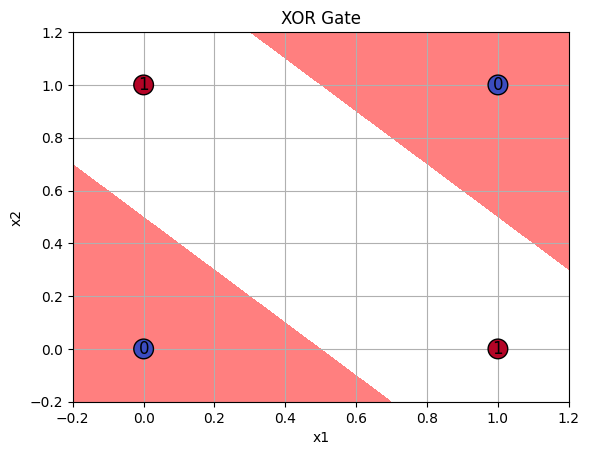

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def p(x1, x2, w, b):
    s = w[0] * x1 + w[1] * x2 + b
    return 1 if s > 0 else 0

def AND(x1, x2):
    return p(x1, x2, [1, 1], -1.5)

def OR(x1, x2):
    return p(x1, x2, [1, 1], -0.5)

def NAND(x1, x2):
    return p(x1, x2, [-1, -1], 1.5)

def NOR(x1, x2):
    return p(x1, x2, [-1, -1], 0.5)

def NOT(x1):
    return p(x1, 0, [-1, 0], 0.5)

def XOR(x1, x2):
    return AND(OR(x1, x2), NAND(x1, x2))

def plot_gate(func, title):
    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([func(a, b) for a, b in x])

    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', s=200)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    for (a, b, lbl) in zip(x[:, 0], x[:, 1], y):
        plt.text(a, b, f'{lbl}', fontsize=12, ha='center', va='center')
    plt.grid()
    plt.show()

def plot_gate_with_db(func, title, w, b):
    x1_vals = np.linspace(-0.2, 1.2, 100)
    x2_vals = np.linspace(-0.2, 1.2, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = np.zeros_like(X1)

    for i in range(len(x1_vals)):
        for j in range(len(x2_vals)):
            Z[i, j] = p(X1[i, j], X2[i, j], w, b)

    plt.contourf(X1, X2, Z, levels=[-0.5, 0.5], colors=['red', 'blue'], alpha=0.5)

    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([func(a, b) for a, b in x])

    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', s=200, edgecolors='k', zorder=5)
    for (a, b, lbl) in zip(x[:, 0], x[:, 1], y):
        plt.text(a, b, f'{lbl}', fontsize=12, ha='center', va='center', zorder=6)

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

# Print and plot gates
gate_params = {
    "AND": ([1, 1], -1.5),
    "OR": ([1, 1], -0.5),
    "NAND": ([-1, -1], 1.5),
    "NOR": ([-1, -1], 0.5),
    "XOR": ([1, 1], -1.5),  # XOR won't show a perfect decision boundary
}

for name, gate in [("AND", AND), ("OR", OR), ("NAND", NAND), ("NOR", NOR)]:
    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    print(f"{name} Gate:")
    for a, b in x:
        print(f"Input: [{a} {b}], Output: {gate(a, b)}")
    plot_gate_with_db(gate, f"{name} Gate", *gate_params[name])

# XOR Gate Plot
def plot_XOR():
    x1_vals = np.linspace(-0.2, 1.2, 100)
    x2_vals = np.linspace(-0.2, 1.2, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = np.zeros_like(X1)

    for i in range(len(x1_vals)):
        for j in range(len(x2_vals)):
            Z[i, j] = XOR(X1[i, j], X2[i, j])

    plt.contourf(X1, X2, Z, levels=[-0.5, 0.5], colors=['red', 'blue'], alpha=0.5)

    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([XOR(a, b) for a, b in x])

    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', s=200, edgecolors='k', zorder=5)
    for (a, b, lbl) in zip(x[:, 0], x[:, 1], y):
        plt.text(a, b, f'{lbl}', fontsize=12, ha='center', va='center', zorder=6)

    plt.title("XOR Gate")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

print("XOR Gate:")
for a, b in np.array([[0, 0], [0, 1], [1, 0], [1, 1]]):
    print(f"Input: [{a} {b}], Output: {XOR(a, b)}")
plot_XOR()


## 2. Stochastic, Mini Batch and Batch Gradient Descent


Running BGD...


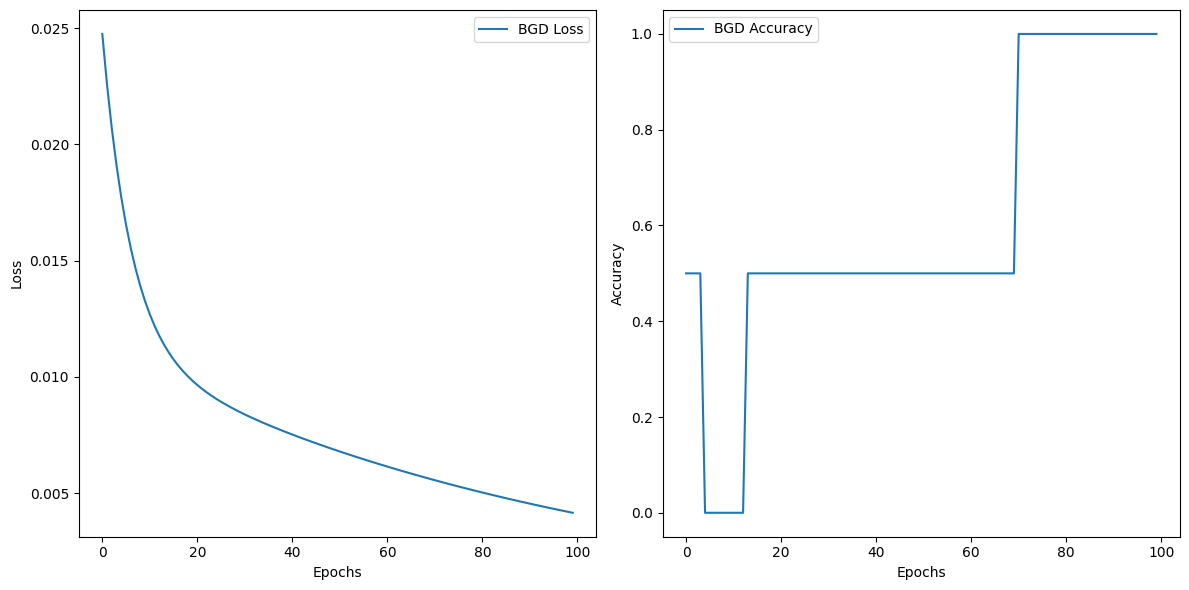


Running SGD...


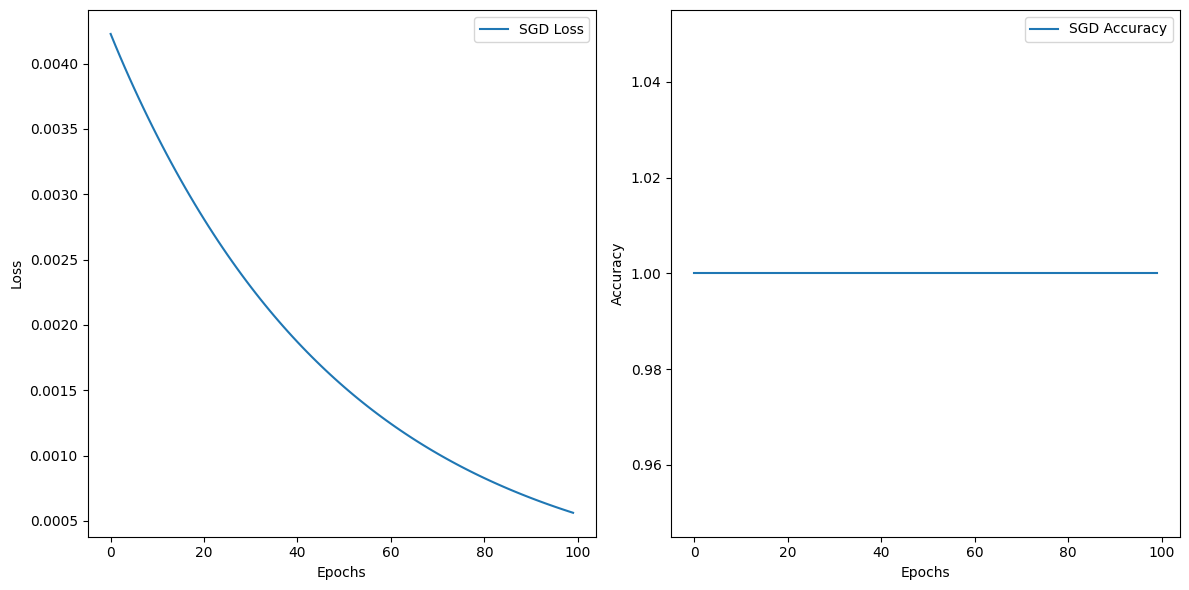

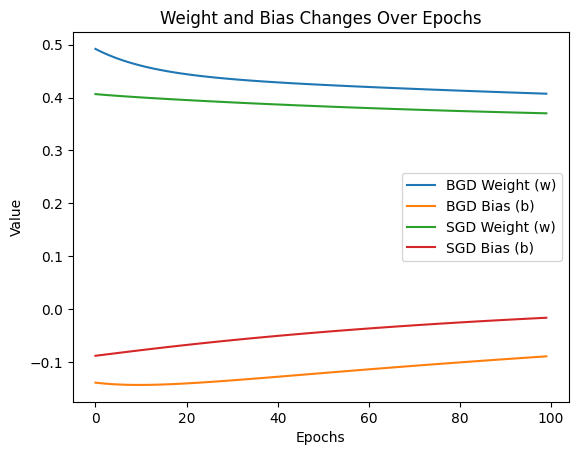

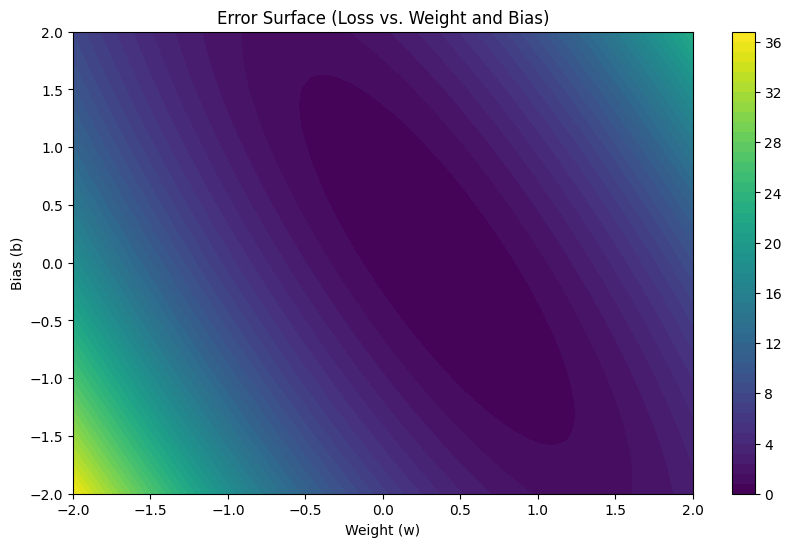

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

# Initialize random weights and biases
np.random.seed(42)
w = np.random.randn()
b = np.random.randn()

# Learning rate and hyperparameters
learning_rate = 0.01
epochs = 100
batch_size = 1  # Size of each mini-batch (can be adjusted)

# Functions: Forward pass, Loss, Gradients
def forward(x, w, b):
    return w * x + b

def loss(y_pred, y):
    return np.mean((y_pred - y)**2)

def gradients(x, y, y_pred):
    dw = np.mean(2 * x * (y_pred - y))
    db = np.mean(2 * (y_pred - y))
    return dw, db

def accuracy(y_pred, y):
    return np.mean(np.isclose(y_pred, y, atol=0.1))  # Tolerance for accuracy calculation

# 1. Batch Gradient Descent
def batch_gradient_descent(X, Y, epochs, learning_rate):
    global w, b
    weight_history, loss_history, accuracy_history = [], [], []
    for epoch in range(epochs):
        y_pred = forward(X, w, b)
        epoch_loss = loss(y_pred, Y)
        epoch_accuracy = accuracy(y_pred, Y)

        dw, db = gradients(X, Y, y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db

        weight_history.append((w, b))
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)
    return weight_history, loss_history, accuracy_history

# 2. Stochastic Gradient Descent
def stochastic_gradient_descent(X, Y, epochs, learning_rate):
    global w, b
    weight_history, loss_history, accuracy_history = [], [], []
    for epoch in range(epochs):
        epoch_loss, epoch_accuracy = 0, 0
        for i in range(len(X)):
            y_pred = forward(X[i], w, b)
            epoch_loss += loss(y_pred, Y[i])
            epoch_accuracy += accuracy(y_pred, Y[i])

            dw, db = gradients(X[i], Y[i], y_pred)
            w -= learning_rate * dw
            b -= learning_rate * db

        weight_history.append((w, b))
        loss_history.append(epoch_loss / len(X))
        accuracy_history.append(epoch_accuracy / len(X))
    return weight_history, loss_history, accuracy_history

# 3. Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, Y, epochs, learning_rate, batch_size):
    global w, b
    weight_history, loss_history, accuracy_history = [], [], []
    num_samples = len(X)

    for epoch in range(epochs):
        epoch_loss, epoch_accuracy = 0, 0
        # Shuffle dataset for each epoch to improve convergence
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        # Process in mini-batches
        for i in range(0, num_samples, batch_size):
            # Select mini-batch
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]

            # Forward pass for mini-batch
            y_pred = forward(X_batch, w, b)

            # Calculate loss and accuracy for mini-batch
            epoch_loss += loss(y_pred, Y_batch)
            epoch_accuracy += accuracy(y_pred, Y_batch)

            # Calculate gradients for mini-batch
            dw, db = gradients(X_batch, Y_batch, y_pred)

            # Update weights and bias
            w -= learning_rate * dw
            b -= learning_rate * db

        weight_history.append((w, b))
        loss_history.append(epoch_loss / (num_samples // batch_size))
        accuracy_history.append(epoch_accuracy / (num_samples // batch_size))

    return weight_history, loss_history, accuracy_history

# Error Surface Plot
def plot_error_surface(X, Y):
    w_range = np.linspace(-2, 2, 50)
    b_range = np.linspace(-2, 2, 50)
    W, B = np.meshgrid(w_range, b_range)
    Loss = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            y_pred = W[i, j] * X + B[i, j]
            Loss[i, j] = loss(y_pred, Y)

    plt.figure(figsize=(10, 6))
    cp = plt.contourf(W, B, Loss, levels=50, cmap='viridis')
    plt.colorbar(cp)
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.title('Error Surface (Loss vs. Weight and Bias)')
    plt.show()

# Perform experiments
def perform_experiment(method, X, Y, epochs, learning_rate, batch_size=1):
    if method == 'bgd':
        return batch_gradient_descent(X, Y, epochs, learning_rate)
    elif method == 'sgd':
        return stochastic_gradient_descent(X, Y, epochs, learning_rate)
    elif method == 'mbgd':
        return mini_batch_gradient_descent(X, Y, epochs, learning_rate, batch_size)
    else:
        raise ValueError("Invalid method. Choose 'bgd', 'sgd', or 'mbgd'.")

# Run experiments and plot results
methods = ['bgd', 'sgd', 'mbgd']
results = {}

for method in methods:
    print(f"\nRunning {method.upper()}...")
    weight_history, loss_history, accuracy_history = perform_experiment(method, X, Y, epochs, learning_rate, batch_size=1)
    results[method] = (weight_history, loss_history, accuracy_history)

    # Plot Loss and Accuracy
    plt.figure(figsize=(12, 6))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label=f'{method.upper()} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(accuracy_history, label=f'{method.upper()} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Compare weight and bias changes
for method in methods:
    weight_changes = np.array(results[method][0])
    plt.plot(weight_changes[:, 0], label=f'{method.upper()} Weight (w)')
    plt.plot(weight_changes[:, 1], label=f'{method.upper()} Bias (b)')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Weight and Bias Changes Over Epochs')
plt.legend()
plt.show()

# Plot error surface
plot_error_surface(X, Y)

nag gradient descent


Running NAG...


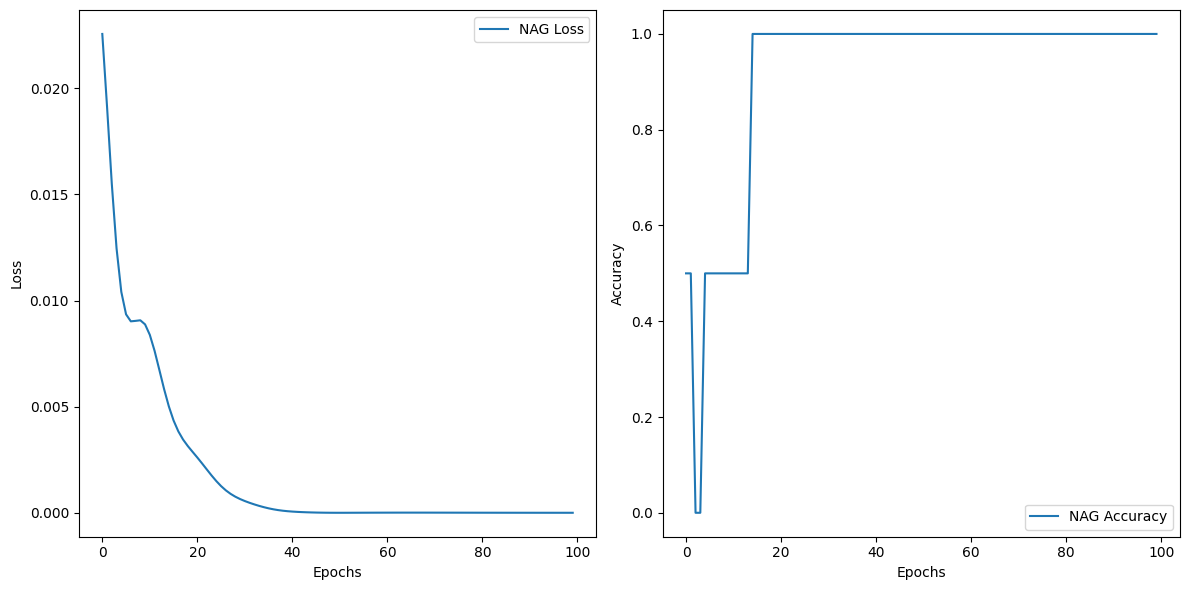

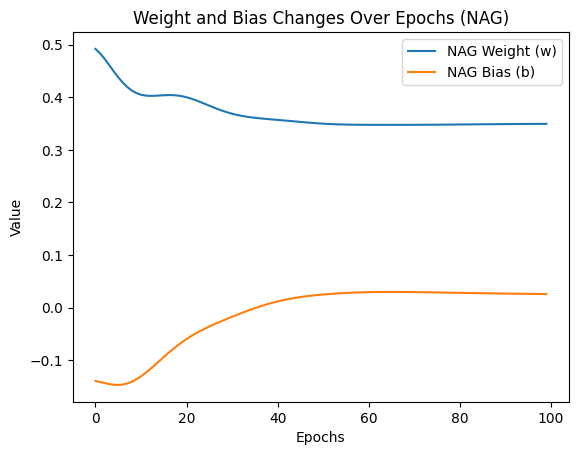

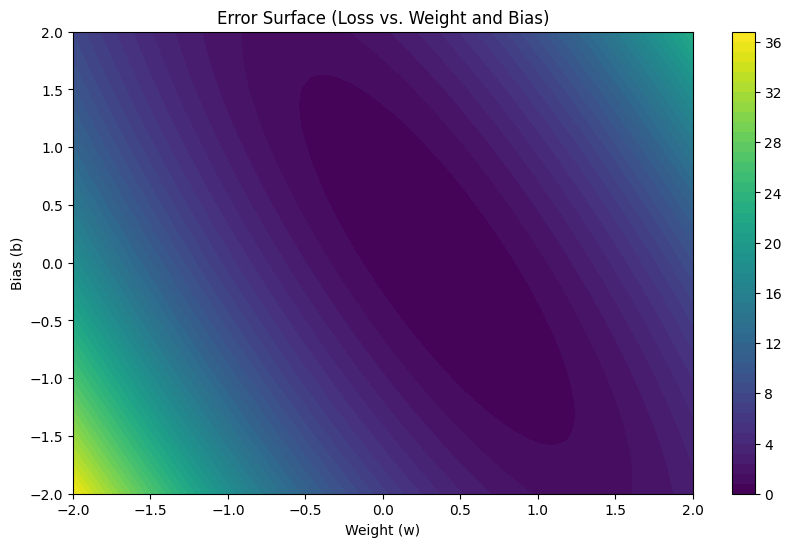

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

# Initialize random weights and biases
np.random.seed(42)
w = np.random.randn()
b = np.random.randn()

# Hyperparameters
learning_rate = 0.01
epochs = 100
gamma = 0.9  # Momentum factor

# Initialize velocity terms for weight and bias
v_w = 0
v_b = 0

# Functions: Forward pass, Loss, Gradients
def forward(x, w, b):
    return w * x + b

def loss(y_pred, y):
    return np.mean((y_pred - y)**2)

def gradients(x, y, y_pred):
    dw = np.mean(2 * x * (y_pred - y))
    db = np.mean(2 * (y_pred - y))
    return dw, db

def accuracy(y_pred, y):
    return np.mean(np.isclose(y_pred, y, atol=0.1))  # Tolerance for accuracy calculation

# Nesterov Accelerated Gradient Descent
def nesterov_accelerated_gradient_descent(X, Y, epochs, learning_rate, gamma):
    global w, b, v_w, v_b
    weight_history, loss_history, accuracy_history = [], [], []

    for epoch in range(epochs):
        # Lookahead step
        w_lookahead = w - gamma * v_w
        b_lookahead = b - gamma * v_b

        # Calculate gradients at the lookahead position
        y_pred = forward(X, w_lookahead, b_lookahead)
        dw, db = gradients(X, Y, y_pred)

        # Update velocity
        v_w = gamma * v_w + learning_rate * dw
        v_b = gamma * v_b + learning_rate * db

        # Update parameters
        w -= v_w
        b -= v_b

        # Record history
        weight_history.append((w, b))
        loss_history.append(loss(forward(X, w, b), Y))
        accuracy_history.append(accuracy(forward(X, w, b), Y))

    return weight_history, loss_history, accuracy_history

# Run NAG
print("\nRunning NAG...")
weight_history, loss_history, accuracy_history = nesterov_accelerated_gradient_descent(X, Y, epochs, learning_rate, gamma)

# Plot Loss and Accuracy
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='NAG Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='NAG Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Compare Weight and Bias Changes Over Epochs
weight_changes = np.array(weight_history)
plt.plot(weight_changes[:, 0], label='NAG Weight (w)')
plt.plot(weight_changes[:, 1], label='NAG Bias (b)')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Weight and Bias Changes Over Epochs (NAG)')
plt.legend()
plt.show()

# Error Surface Plot
def plot_error_surface(X, Y):
    w_range = np.linspace(-2, 2, 50)
    b_range = np.linspace(-2, 2, 50)
    W, B = np.meshgrid(w_range, b_range)
    Loss = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            y_pred = W[i, j] * X + B[i, j]
            Loss[i, j] = loss(y_pred, Y)

    plt.figure(figsize=(10, 6))
    cp = plt.contourf(W, B, Loss, levels=50, cmap='viridis')
    plt.colorbar(cp)
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.title('Error Surface (Loss vs. Weight and Bias)')
    plt.show()

# Plot error surface for NAG
plot_error_surface(X, Y)


Batch Gradient Descent with Momentum


Running Batch Momentum GD...


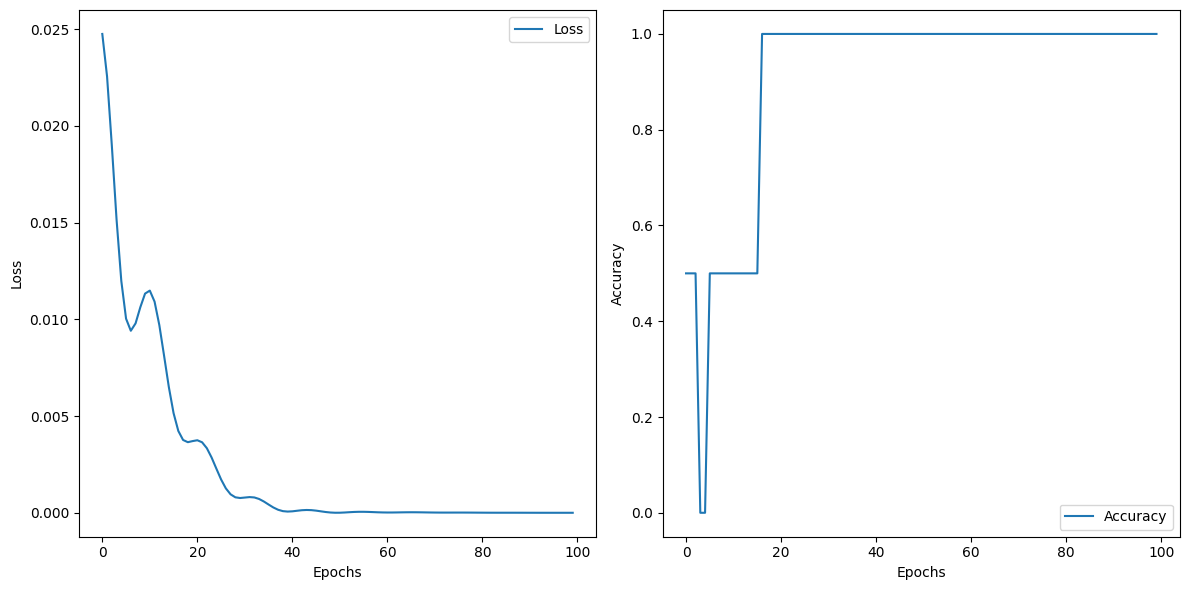

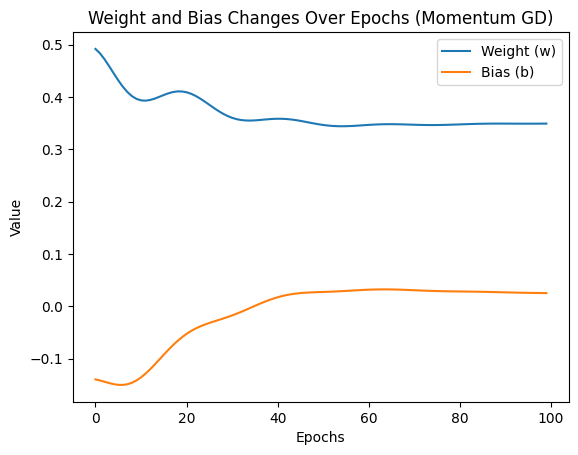

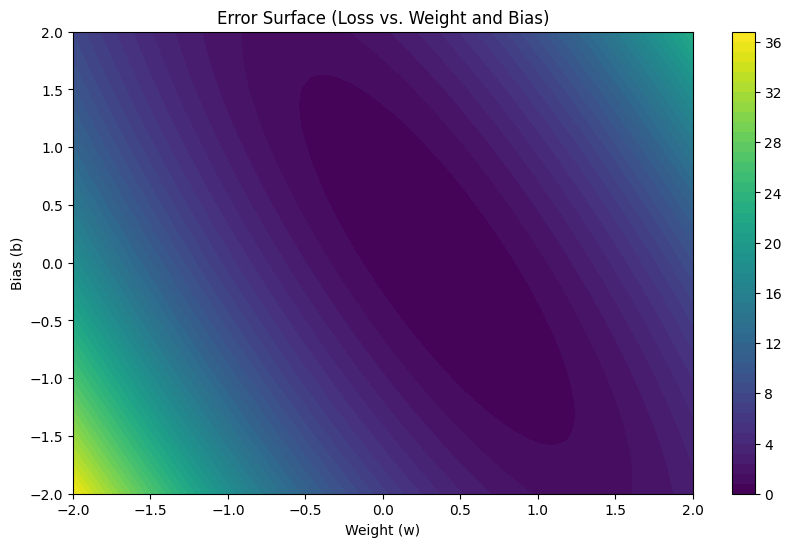

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
x = np.array([0.5, 2.5])
y = np.array([0.2, 0.9])

# Initialize random weights and biases
np.random.seed(42)
w = np.random.randn()
b = np.random.randn()

# Hyperparameters
lr = 0.01  # Learning rate
epochs = 100
gamma = 0.9  # Momentum factor

# Initialize velocity terms for weight and bias
vw = 0
vb = 0

# Functions: Forward pass, Loss, Gradients
def fwd(x, w, b):
    return w * x + b

def l(pred, y):
    return np.mean((pred - y)**2)

def grads(x, y, pred):
    dw = np.mean(2 * x * (pred - y))
    db = np.mean(2 * (pred - y))
    return dw, db

def acc(pred, y):
    return np.mean(np.isclose(pred, y, atol=0.1))  # Tolerance for accuracy calculation

# Batch Gradient Descent with Momentum
def batch_momentum_gd(x, y, epochs, lr, gamma):
    global w, b, vw, vb
    w_hist, l_hist, a_hist = [], [], []

    for _ in range(epochs):
        # Forward pass
        pred = fwd(x, w, b)

        # Compute loss and accuracy
        loss = l(pred, y)
        accuracy = acc(pred, y)

        # Calculate gradients
        dw, db = grads(x, y, pred)

        # Update velocities
        vw = gamma * vw + lr * dw
        vb = gamma * vb + lr * db

        # Update parameters
        w -= vw
        b -= vb

        # Record history
        w_hist.append((w, b))
        l_hist.append(loss)
        a_hist.append(accuracy)

    return w_hist, l_hist, a_hist

# Run Batch Momentum GD
print("\nRunning Batch Momentum GD...")
w_hist, l_hist, a_hist = batch_momentum_gd(x, y, epochs, lr, gamma)

# Plot Loss and Accuracy
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(l_hist, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(a_hist, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Compare Weight and Bias Changes Over Epochs
w_changes = np.array(w_hist)
plt.plot(w_changes[:, 0], label='Weight (w)')
plt.plot(w_changes[:, 1], label='Bias (b)')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Weight and Bias Changes Over Epochs (Momentum GD)')
plt.legend()
plt.show()

# Error Surface Plot
def plot_error_surface(x, y):
    w_range = np.linspace(-2, 2, 50)
    b_range = np.linspace(-2, 2, 50)
    W, B = np.meshgrid(w_range, b_range)
    L = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            pred = W[i, j] * x + B[i, j]
            L[i, j] = l(pred, y)

    plt.figure(figsize=(10, 6))
    cp = plt.contourf(W, B, L, levels=50, cmap='viridis')
    plt.colorbar(cp)
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.title('Error Surface (Loss vs. Weight and Bias)')
    plt.show()

# Plot error surface for Batch Momentum GD
plot_error_surface(x, y)


## 3. Backpropogation

Epoch 0, Loss: 1.0985, MSE: 0.2222, Accuracy: 0.3417
Epoch 500, Loss: 1.0975, MSE: 0.2220, Accuracy: 0.3417
Epoch 1000, Loss: 1.0897, MSE: 0.2203, Accuracy: 0.3583
Epoch 1500, Loss: 1.0224, MSE: 0.2051, Accuracy: 0.7833
Epoch 2000, Loss: 0.7870, MSE: 0.1517, Accuracy: 0.8417
Epoch 2500, Loss: 0.5898, MSE: 0.1121, Accuracy: 0.8833
Epoch 3000, Loss: 0.4927, MSE: 0.0942, Accuracy: 0.9167
Epoch 3500, Loss: 0.4350, MSE: 0.0826, Accuracy: 0.9250
Epoch 4000, Loss: 0.3935, MSE: 0.0735, Accuracy: 0.9250
Epoch 4500, Loss: 0.3603, MSE: 0.0659, Accuracy: 0.9250


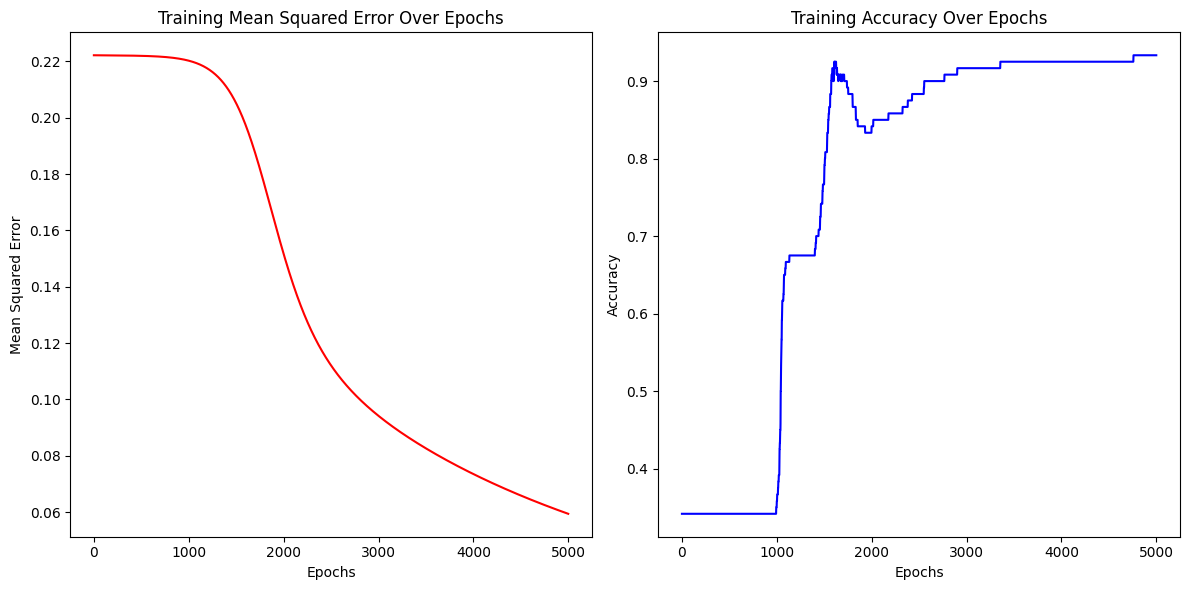

Test Accuracy: 93.33%


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert labels to one-hot encoding
y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Initialize random weights for a simple neural network
input_size = X_train.shape[1]  # 4 features
hidden_size = 10  # Number of neurons in the hidden layer
output_size = y_train.shape[1]  # 3 classes

# Initialize weights with a smaller range
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation functions (ReLU and Softmax)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Feedforward function
def feedforward(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return A1, A2

# Cross-Entropy Loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m
    return loss

# Backpropagation to compute gradients
def backpropagation(X, y, A1, A2, W1, W2, b1, b2, learning_rate=0.01):
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases using the calculated gradients
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

# Train the neural network
epochs = 5000  # Increased epochs
learning_rate = 0.01  # Decreased learning rate
losses = []
accuracies = []
mse_values = []

for epoch in range(epochs):
    # Feedforward pass
    A1, A2 = feedforward(X_train, W1, b1, W2, b2)

    # Calculate loss and MSE
    loss = compute_loss(y_train, A2)
    mse = np.mean((y_train - A2)**2)  # Calculate Mean Squared Error
    losses.append(loss)
    mse_values.append(mse)

    # Calculate accuracy
    predictions = np.argmax(A2, axis=1)
    accuracy = accuracy_score(np.argmax(y_train, axis=1), predictions)
    accuracies.append(accuracy)

    # Backpropagation
    W1, b1, W2, b2 = backpropagation(X_train, y_train, A1, A2, W1, W2, b1, b2, learning_rate)

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, MSE: {mse:.4f}, Accuracy: {accuracy:.4f}')

# Plot the training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(mse_values, color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Mean Squared Error Over Epochs')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')

plt.tight_layout()
plt.show()

# Test the model on test data
_, A2_test = feedforward(X_test, W1, b1, W2, b2)
test_predictions = np.argmax(A2_test, axis=1)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

## 4. Optimizer

Using optimizer: Gradient Descent
Final weights: [0.05233199 0.05233199], Bias: 0.03576994745472863
Training time: 0.02 seconds
Using optimizer: Stochastic GD
Final weights: [0.06876117 0.06876117], Bias: 0.05409324533035377
Training time: 0.02 seconds
Using optimizer: SGD with Momentum
Final weights: [0.08625676 0.08625676], Bias: 0.24489623755491388
Training time: 0.03 seconds
Using optimizer: Mini-batch GD
Final weights: [0. 0.], Bias: 0
Training time: 0.01 seconds
Using optimizer: Adagrad
Final weights: [-0.14713252 -0.14713252], Bias: -0.16001028109981413
Training time: 0.03 seconds
Using optimizer: RMSprop
Final weights: [-2.04560828 -2.04560828], Bias: -2.032099446898148
Training time: 0.03 seconds
Using optimizer: Adadelta
Final weights: [0.04706446 0.04706446], Bias: 0.11496001500897711
Training time: 0.04 seconds
Using optimizer: Adam
Final weights: [-0.83927978 -0.83927978], Bias: -1.3946970112280486
Training time: 0.03 seconds


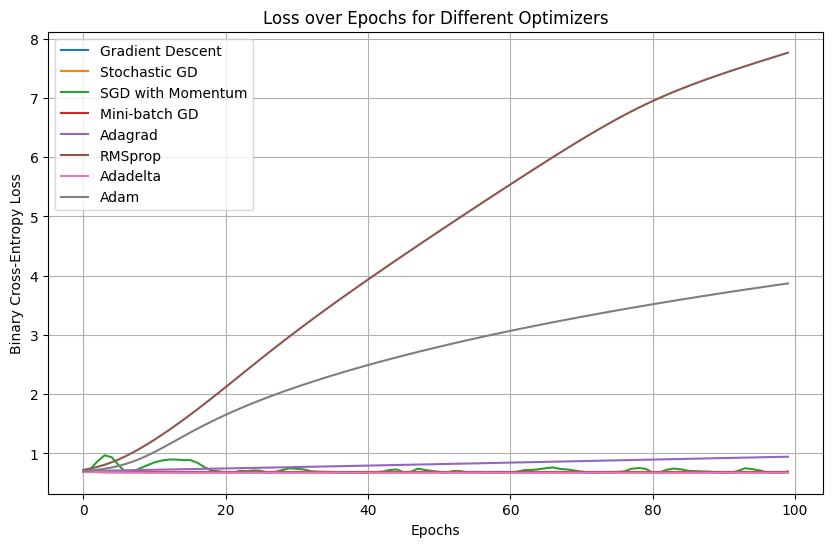

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with Gradient Descent...
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6441 - loss: 1.3414 - val_accuracy: 0.8970 - val_loss: 0.4244
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8760 - loss: 0.4666 - val_accuracy: 0.9118 - val_loss: 0.3241
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8950 - loss: 0.3796 - val_accuracy: 0.9198 - val_loss: 0.2868
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9067 - loss: 0.3370 - val_accuracy: 0.9255 - val_loss: 0.2644
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9112 - loss: 0.3162 - val_accuracy: 0.9310 - val_loss: 0.2474
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9165 - loss: 0.2955 - val_accuracy: 0.9350 - val_loss: 0.2335
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9185 - loss: 0.2892 - val_accuracy: 0.9377 - val_loss: 0.2225
Epoch 8/10
844/844 

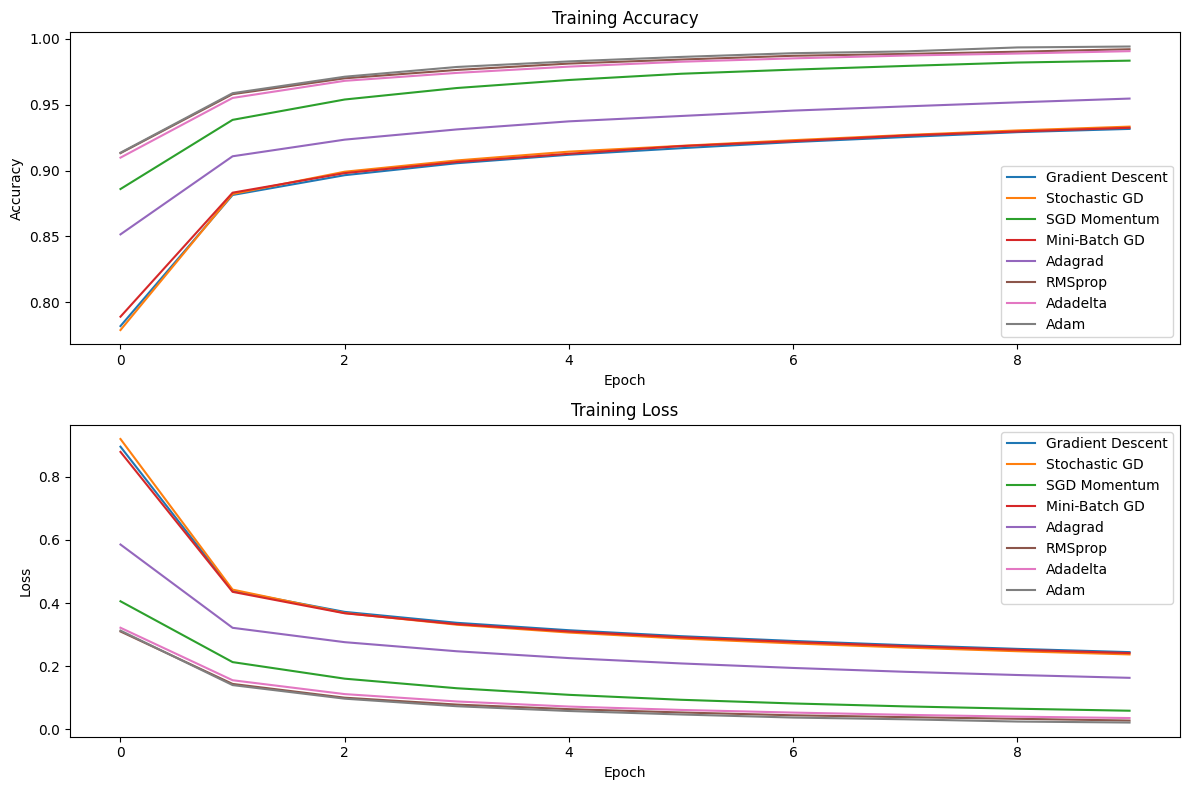

Gradient Descent training time: 37.14 seconds
Stochastic GD training time: 37.14 seconds
SGD Momentum training time: 44.39 seconds
Mini-Batch GD training time: 42.06 seconds
Adagrad training time: 48.65 seconds
RMSprop training time: 46.73 seconds
Adadelta training time: 46.51 seconds
Adam training time: 46.71 seconds


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore", category=UserWarning)


def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

def perceptron(x, w, b):
  return np.dot(x, w) + b

# Loss function (Binary Cross-Entropy Loss)
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-8  # To avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))


# 1. Gradient Descent Optimizer
def gradient_descent(features, target_values, learning_rate=0.01, epochs=100):
    weight = np.zeros(features.shape[1])
    bias = 0
    number_of_samples = len(features)
    losses = []

    for epoch in range(epochs):
        for sample_index in range(number_of_samples):
            current_feature = features[sample_index]
            current_target = target_values[sample_index]
            predicted_value = perceptron(current_feature, weight, bias)
            output_prediction = sigmoid(predicted_value)
            weight_gradient = (current_target - output_prediction) * sigmoid_derivative(predicted_value) * current_feature
            bias_gradient = (current_target - output_prediction) * sigmoid_derivative(predicted_value)
            weight = weight + learning_rate * weight_gradient
            bias = bias + learning_rate * bias_gradient

        # Track the loss at each epoch
        y_pred = sigmoid(np.dot(features, weight) + bias)
        loss = binary_cross_entropy_loss(target_values, y_pred)
        losses.append(loss)

    return weight, bias, losses

# 2. Stochastic Gradient Descent Optimizer
def stochastic_gradient_descent(features, labels, learning_rate=0.01, epochs=100):
    weight = np.zeros(features.shape[1])
    bias = 0
    num_samples = len(features)
    losses = []

    for epoch in range(epochs):
        for i in range(num_samples):
            random_index = np.random.randint(0, num_samples)
            feature = features[random_index]
            label = labels[random_index]
            value = perceptron(feature, weight, bias)
            predicted_value = sigmoid(value)
            weight_gradient = (label - predicted_value) * sigmoid_derivative(value) * feature
            bias_gradient = (label - predicted_value) * sigmoid_derivative(value)
            weight = weight + learning_rate * weight_gradient
            bias = bias + learning_rate * bias_gradient

        # Track the loss at each epoch
        y_pred = sigmoid(np.dot(features, weight) + bias)
        loss = binary_cross_entropy_loss(labels, y_pred)
        losses.append(loss)

    return weight, bias, losses

# 3. SGD with Momentum Optimizer
def sgd_with_momentum(features, labels, learning_rate=0.01, momentum=0.9, epochs=100):
    weight = np.zeros(features.shape[1])
    bias = 0
    weight_velocity, bias_velocity = 0, 0
    num_samples = len(features)
    losses = []

    for epoch in range(epochs):
        for i in range(num_samples):
            random_index = np.random.randint(0, num_samples)
            feature = features[random_index]
            label = labels[random_index]
            value = perceptron(feature, weight, bias)
            predicted_value = sigmoid(value)
            weight_gradient = (label - predicted_value) * sigmoid_derivative(value) * feature
            bias_gradient = (label - predicted_value) * sigmoid_derivative(value)
            weight_velocity = momentum * weight_velocity + learning_rate * weight_gradient
            bias_velocity = momentum * bias_velocity + learning_rate * bias_gradient
            weight = weight + weight_velocity
            bias = bias + bias_velocity

        # Track the loss at each epoch
        y_pred = sigmoid(np.dot(features, weight) + bias)
        loss = binary_cross_entropy_loss(labels, y_pred)
        losses.append(loss)

    return weight, bias, losses

# 4. Mini-batch Gradient Descent Optimizer
def mini_batch_gradient_descent(features, target_values, learning_rate=0.01, epochs=100, batch_size=32):
    weight = np.zeros(features.shape[1])
    bias = 0
    num_samples = len(features)
    num_batches = num_samples // batch_size
    losses = []

    for epoch in range(epochs):
        for batch in range(num_batches):
            batch_start_index = batch * batch_size
            batch_end_index = min((batch + 1) * batch_size, num_samples)
            batch_features = features[batch_start_index:batch_end_index]
            batch_target_values = target_values[batch_start_index:batch_end_index]

            weight_gradient, bias_gradient = 0, 0
            for feature_vector, target_value in zip(batch_features, batch_target_values):
                value = perceptron(feature_vector, weight, bias)
                predicted_value = sigmoid(value)
                weight_gradient += (target_value - predicted_value) * sigmoid_derivative(value) * feature_vector
                bias_gradient += (target_value - predicted_value) * sigmoid_derivative(value)

            weight = weight + learning_rate * (weight_gradient / batch_size)
            bias = bias + learning_rate * (bias_gradient / batch_size)

        # Track the loss at each epoch
        y_pred = sigmoid(np.dot(features, weight) + bias)
        loss = binary_cross_entropy_loss(target_values, y_pred)
        losses.append(loss)

    return weight, bias, losses

# 5. Adagrad Optimizer
def adagrad(X, Y, learning_rate=0.01, epsilon=1e-8, epochs=100):
    weight = np.zeros(X.shape[1])
    bias = 0
    squared_gradient_weight, squared_gradient_bias = 0, 0
    number_of_samples = len(X)
    losses = []

    for epoch in range(epochs):
        for i in range(number_of_samples):
            sample = X[i]
            target_value = Y[i]
            perceptron_input = perceptron(sample, weight, bias)
            predicted_output = sigmoid(perceptron_input)
            gradient_weight = (target_value - predicted_output) * sigmoid_derivative(perceptron_input) * sample
            gradient_bias = (target_value - predicted_output) * sigmoid_derivative(perceptron_input)
            squared_gradient_weight += gradient_weight**2
            squared_gradient_bias += gradient_bias**2
            weight = weight - learning_rate * gradient_weight / (np.sqrt(squared_gradient_weight) + epsilon)
            bias = bias - learning_rate * gradient_bias / (np.sqrt(squared_gradient_bias) + epsilon)

        # Track the loss at each epoch
        y_pred = sigmoid(np.dot(X, weight) + bias)
        loss = binary_cross_entropy_loss(Y, y_pred)
        losses.append(loss)

    return weight, bias, losses

# 6. RMSprop Optimizer
def rmsprop(X, Y, learning_rate=0.01, rho=0.9, epsilon=1e-8, epochs=100):
    weight = np.zeros(X.shape[1])
    bias = 0
    squared_gradient_weight, squared_gradient_bias = 0, 0
    number_of_samples = len(X)
    losses = []

    for epoch in range(epochs):
        for i in range(number_of_samples):
            sample = X[i]
            target_output = Y[i]
            to_activation = perceptron(sample, weight, bias)
            predicted_output = sigmoid(to_activation)
            gradient_weight = (target_output - predicted_output) * sigmoid_derivative(to_activation) * sample
            gradient_bias = (target_output - predicted_output) * sigmoid_derivative(to_activation)
            squared_gradient_weight = rho * squared_gradient_weight + (1 - rho) * gradient_weight**2
            squared_gradient_bias = rho * squared_gradient_bias + (1 - rho) * gradient_bias**2
            weight = weight - learning_rate * gradient_weight / (np.sqrt(squared_gradient_weight) + epsilon)
            bias = bias - learning_rate * gradient_bias / (np.sqrt(squared_gradient_bias) + epsilon)

        # Track the loss at each epoch
        y_pred = sigmoid(np.dot(X, weight) + bias)
        loss = binary_cross_entropy_loss(Y, y_pred)
        losses.append(loss)

    return weight, bias, losses

# 7. Adadelta Optimizer
def adadelta(X, Y, learning_rate=0.01, rho=0.95, epsilon=1e-6, epochs=100):
    weight = np.zeros(X.shape[1])
    bias = 0
    accumulated_squared_gradient_weight, accumulated_squared_gradient_bias = 0, 0
    accumulated_squared_update_weight, accumulated_squared_update_bias = 0, 0
    number_of_samples = len(X)
    losses = []

    for epoch in range(epochs):
        for i in range(number_of_samples):
            x = X[i]
            y = Y[i]
            value = perceptron(x, weight, bias)
            predicted_output = sigmoid(value)
            gradient_weight = (y - predicted_output) * sigmoid_derivative(value) * x
            gradient_bias = (y - predicted_output) * sigmoid_derivative(value)
            accumulated_squared_gradient_weight = rho * accumulated_squared_gradient_weight + (1 - rho) * gradient_weight**2
            accumulated_squared_gradient_bias = rho * accumulated_squared_gradient_bias + (1 - rho) * gradient_bias**2
            update_weight = (np.sqrt(accumulated_squared_update_weight + epsilon) /
                             np.sqrt(accumulated_squared_gradient_weight + epsilon)) * gradient_weight
            update_bias = (np.sqrt(accumulated_squared_update_bias + epsilon) /
                           np.sqrt(accumulated_squared_gradient_bias + epsilon)) * gradient_bias
            weight = weight + update_weight
            bias = bias + update_bias
            accumulated_squared_update_weight = rho * accumulated_squared_update_weight + (1 - rho) * update_weight**2
            accumulated_squared_update_bias = rho * accumulated_squared_update_bias + (1 - rho) * update_bias**2

        # Track the loss at each epoch
        y_pred = sigmoid(np.dot(X, weight) + bias)
        loss = binary_cross_entropy_loss(Y, y_pred)
        losses.append(loss)

    return weight, bias, losses

# 8. Adam Optimizer
def adam(X, Y, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=100):
    weight = np.zeros(X.shape[1])
    bias = 0
    m_w, v_w, m_b, v_b = 0, 0, 0, 0
    t = 0
    losses = []

    for epoch in range(epochs):
        for i in range(len(X)):
            x = X[i]
            y = Y[i]
            t += 1
            value = perceptron(x, weight, bias)
            predicted_value = sigmoid(value)
            gradient_weight = (y - predicted_value) * sigmoid_derivative(value) * x
            gradient_bias = (y - predicted_value) * sigmoid_derivative(value)
            m_w = beta1 * m_w + (1 - beta1) * gradient_weight
            m_b = beta1 * m_b + (1 - beta1) * gradient_bias
            v_w = beta2 * v_w + (1 - beta2) * gradient_weight**2
            v_b = beta2 * v_b + (1 - beta2) * gradient_bias**2
            m_w_hat = m_w / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_w_hat = v_w / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)
            weight = weight - learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
            bias = bias - learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

        # Track the loss at each epoch
        y_pred = sigmoid(np.dot(X, weight) + bias)
        loss = binary_cross_entropy_loss(Y, y_pred)
        losses.append(loss)

    return weight, bias, losses

# Test each optimizer
# Use a synthetic dataset
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
Y = np.array([1, 0, 1, 0, 1])

optimizers = [
    ("Gradient Descent", gradient_descent),
    ("Stochastic GD", stochastic_gradient_descent),
    ("SGD with Momentum", sgd_with_momentum),
    ("Mini-batch GD", mini_batch_gradient_descent),
    ("Adagrad", adagrad),
    ("RMSprop", rmsprop),
    ("Adadelta", adadelta),
    ("Adam", adam)
]

epochs = 100
learning_rate = 0.01

# Initialize plot
plt.figure(figsize=(10, 6))

for optimizer_name, optimizer in optimizers:
    print(f"Using optimizer: {optimizer_name}")
    start_time = time.time()
    weight, bias, losses = optimizer(X, Y, learning_rate=learning_rate, epochs=epochs)
    end_time = time.time()
    print(f"Final weights: {weight}, Bias: {bias}")
    print(f"Training time: {end_time - start_time:.2f} seconds")

    # Plot the loss for each optimizer
    plt.plot(range(epochs), losses, label=optimizer_name)

plt.title('Loss over Epochs for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.grid(True)
plt.show()
#pretrained
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

def create_model():
    model = keras.Sequential(
        [
            keras.Input(shape=(784,)),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

optimizers = [
    ("Gradient Descent", tf.keras.optimizers.SGD(learning_rate=0.01)),
    ("Stochastic GD", tf.keras.optimizers.SGD(learning_rate=0.01)),
    ("SGD Momentum", tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)),
    ("Mini-Batch GD", tf.keras.optimizers.SGD(learning_rate=0.01)),
    ("Adagrad", tf.keras.optimizers.Adagrad(learning_rate=0.01)),
    ("RMSprop", tf.keras.optimizers.RMSprop(learning_rate=0.001)),
    ("Adadelta", tf.keras.optimizers.Adadelta(learning_rate=1.0)),
    ("Adam", tf.keras.optimizers.Adam(learning_rate=0.001)),
]

batch_size = 64
epochs = 10

results = {}

for optimizer_name, optimizer in optimizers:
    print(f"Training with {optimizer_name}...")
    model = create_model()
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )

    start_time = time.time()
    history = model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1,
        verbose=1
    )
    end_time = time.time()

    results[optimizer_name] = {
        "history": history,
        "time": end_time - start_time,
    }


plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for optimizer_name, result in results.items():
    plt.plot(result["history"].history["accuracy"], label=optimizer_name)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2, 1, 2)
for optimizer_name, result in results.items():
    plt.plot(result["history"].history["loss"], label=optimizer_name)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

for optimizer_name, result in results.items():
    print(f"{optimizer_name} training time: {result['time']:.2f} seconds")

## 5. Transfer Learning

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Reduce the dataset size to 1000 samples for faster training
x_train, y_train = x_train[:1000], y_train[:1000]
x_test, y_test = x_test[:1000], y_test[:1000]

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Resize images
def resize_images(images, target_size):
    return np.array([tf.image.resize(image, target_size) for image in images])

# Create model with pre-trained base (VGG16, ResNet50, etc.)
def create_model(base_model):
    base_model.trainable = False  # Freeze the base model
    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# LeNet-5 model
def create_lenet5():
    model = tf.keras.Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 3)),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='tanh'),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(120, kernel_size=(5, 5), activation='tanh'),
        Flatten(),
        Dense(84, activation='tanh'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# AlexNet model
def create_alexnet():
    model = tf.keras.Sequential([
        Conv2D(96, kernel_size=(5, 5), strides=(2, 2), activation='relu', input_shape=(150, 150, 3)),
        AveragePooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(256, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(384, kernel_size=(3, 3), activation='relu'),
        Conv2D(384, kernel_size=(3, 3), activation='relu'),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        AveragePooling2D(pool_size=(3, 3), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

# Model dictionary with the pre-trained models and custom models
models_info = {
    "VGG16": {"model": VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3)), "input_size": (32, 32)},
    "ResNet50": {"model": ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3)), "input_size": (32, 32)},
    "InceptionV3": {"model": InceptionV3(weights="imagenet", include_top=False, input_shape=(75, 75, 3)), "input_size": (75, 75)},
    "MobileNet": {"model": MobileNet(weights="imagenet", include_top=False, input_shape=(32, 32, 3)), "input_size": (32, 32)},
    "AlexNet": {"model": create_alexnet(), "input_size": (150, 150)},
    "LeNet-5": {"model": create_lenet5(), "input_size": (32, 32)}
}

# Dictionary to store history and metrics data
history_data = {}
metrics_data = {}

# Training and evaluation loop for each model
for model_name, info in models_info.items():
    print(f"\nTraining with {model_name} as feature extractor...\n")

    # Resize images based on the input size of the model
    x_train_resized = resize_images(x_train, info["input_size"])
    x_test_resized = resize_images(x_test, info["input_size"])

    # Select the model
    model = info["model"] if model_name in ["LeNet-5", "AlexNet"] else create_model(info["model"])

    # Train the model
    history = model.fit(datagen.flow(x_train_resized, y_train, batch_size=64),
                        epochs=5, validation_data=(x_test_resized, y_test), verbose=1)

    # Store the training history
    history_data[model_name] = history.history

    # Predict and evaluate the model
    y_pred = np.argmax(model.predict(x_test_resized), axis=1)
    y_true = y_test.flatten()

    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    accuracy = np.mean(y_pred == y_true)

    metrics_data[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    # Print classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

# Optionally, plot the results for comparison
for model_name, metrics in metrics_data.items():
    plt.plot(history_data[model_name]['accuracy'], label=f'{model_name} Accuracy')

plt.title("Model Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Snippets

## 1. CNN - digits

In [ ]:
import keras
import cv2
import numpy as np
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data for CNN input
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# One-hot encoding for labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Convert data type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Visualize the first few training images
for i in range(10):
    plt.imshow(x_train[i], cmap='gray')
    plt.subplot(5, 2, i + 1)
plt.show()

# Normalize the pixel values to be between 0 and 1
x_train /= 255
x_test /= 255

# Initialize model as None
model = None

# Define batch size and number of epochs
batch_size = 64
epochs = 2

def build_model(optimizer):
    '''
    Define a sequential model with categorical cross entropy as loss function consisting
    2 convolution and 2 pooling layers with relu as activation function followed by
    dropout -> flatten -> dense -> dropout -> dense
    '''
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Dropout layer
    model.add(Dropout(0.25))

    # Flatten layer to convert 2D data to 1D
    model.add(Flatten())

    # Dense layer
    model.add(Dense(128, activation='relu'))

    # Dropout layer
    model.add(Dropout(0.5))

    # Output layer with 10 classes (one for each digit)
    model.add(Dense(10, activation='softmax'))

    # Compile the model with specified optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Define optimizers and build model for each optimizer
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad'] # use whichever is needed
for optimizer in optimizers:
    model = build_model(optimizer)

    # Plot the model architecture
    plot_model(model, to_file="mnist_model_" + optimizer + '.jpg', show_shapes=True)

    # Train the model
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

    # Plot accuracy and validation accuracy
    y1 = hist.history['accuracy']
    y2 = hist.history['val_accuracy']
    plt.plot(y1)
    plt.plot(y2)
    plt.title(f'Model Accuracy for {optimizer}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Save the trained model
    keras.models.save_model(model, f"mnist_{optimizer}.h5", save_format="h5")

In [ ]:
def predict_image(model, img):
    '''
    Reshape the image into (1,28,28)
    Predict the answer and print it
    '''
    img = img.reshape(1, 28, 28, 1)  # Reshape to match the model's input
    img = img.astype('float32')      # Ensure data type is float32
    img /= 255                       # Normalize the image
    prediction = model.predict(img)  # Make a prediction
    print("Predicted class:", np.argmax(prediction))  # Print the predicted class

# Load a trained model and predict on a test image
m = load_model('digits_mnist_adam_saved.h5')  # Load the model
predict_image(m, x_test[3])  # Predict on the 8th test image (index 7)
plt.imshow(x_test[3], cmap='gray')  # Display the image
plt.show()

## 2. CNN - fashion

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


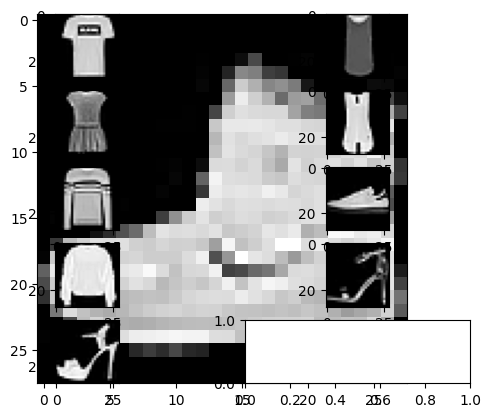

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 67ms/step - accuracy: 0.7068 - loss: 0.8172 - val_accuracy: 0.8532 - val_loss: 0.4048
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 67ms/step - accuracy: 0.8555 - loss: 0.4050 - val_accuracy: 0.8757 - val_loss: 0.3405
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.8781 - loss: 0.3443 - val_accuracy: 0.8958 - val_loss: 0.2984
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.8869 - loss: 0.3211 - val_accuracy: 0.8961 - val_loss: 0.2873
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8974 - loss: 0.2970 - val_accuracy: 0.8912 - val_loss: 0.2937


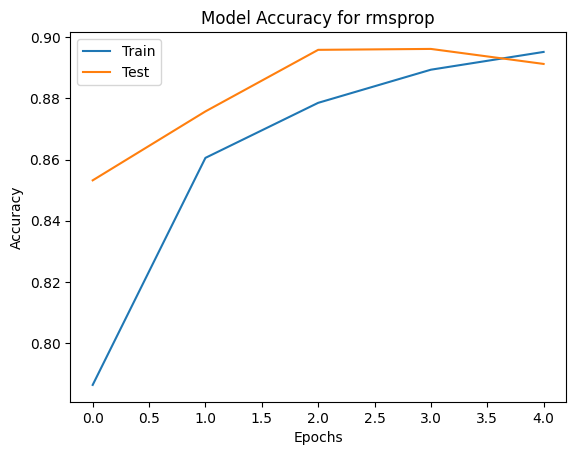

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 67ms/step - accuracy: 0.3425 - loss: 1.7789 - val_accuracy: 0.7125 - val_loss: 0.7937
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 71ms/step - accuracy: 0.6778 - loss: 0.8700 - val_accuracy: 0.7471 - val_loss: 0.6595
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 66ms/step - accuracy: 0.7273 - loss: 0.7294 - val_accuracy: 0.7741 - val_loss: 0.5937
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.7548 - loss: 0.6570 - val_accuracy: 0.7860 - val_loss: 0.5584
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.7665 - loss: 0.6236 - val_accuracy: 0.7926 - val_loss: 0.5399


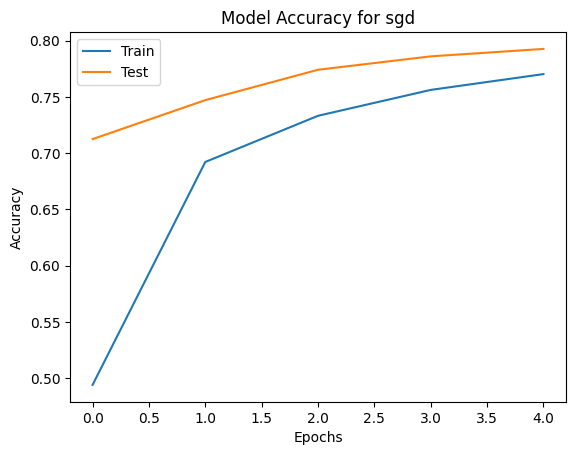

In [6]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the data for CNN input
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# One-hot encoding for labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Convert data type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Visualize the first few training images
for i in range(10):
    plt.imshow(x_train[i], cmap='gray')
    plt.subplot(5, 2, i + 1)
plt.show()

# Normalize the pixel values to be between 0 and 1
x_train /= 255
x_test /= 255

# Initialize model as None
model = None

# Define batch size and number of epochs
batch_size = 64
epochs = 5

def build_model(optimizer):
    '''
    Define a sequential model with categorical cross entropy as loss function consisting
    2 convolution and 2 pooling layers with relu as activation function followed by
    dropout -> flatten -> dense -> dropout -> dense
    '''
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Dropout layer
    model.add(Dropout(0.25))

    # Flatten layer to convert 2D data to 1D
    model.add(Flatten())

    # Dense layer
    model.add(Dense(128, activation='relu'))

    # Dropout layer
    model.add(Dropout(0.5))

    # Output layer with 10 classes (one for each item in fashion MNIST)
    model.add(Dense(10, activation='softmax'))

    # Compile the model with specified optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Call build model with RMSprop and SGD Optimizers
optimizers = ['rmsprop', 'sgd']
for optimizer in optimizers:
    model = build_model(optimizer)

    # Plot the model architecture
    plot_model(model, to_file=f"fashion_mnist_model_{optimizer}.jpg", show_shapes=True)

    # Train the model
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

    # Plot accuracy and validation accuracy
    y1 = hist.history['accuracy']
    y2 = hist.history['val_accuracy']
    plt.plot(y1)
    plt.plot(y2)
    plt.title(f'Model Accuracy for {optimizer}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Save the trained model
    keras.models.save_model(model, f"fashion_mnist_{optimizer}.h5", save_format="h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted class: Sandal


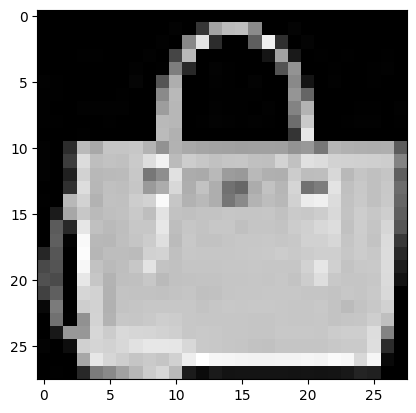

In [ ]:
# Labels for Fashion MNIST classes
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):
    '''
    Reshape the image into (1,28,28)
    Predict the answer and print it
    '''
    img = img.reshape(1, 28, 28, 1)  # Reshape to match the model's input
    img = img.astype('float32')      # Ensure data type is float32
    img /= 255                       # Normalize the image
    prediction = model.predict(img)  # Make a prediction
    predicted_class = np.argmax(prediction)  # Get the class with the highest probability
    print("Predicted class:", labels[predicted_class])  # Print the predicted class

# Load a trained model and predict on a test image
m = load_model('fashion_mnist_sgd.h5')  # Load the model
predict_image(m, x_test[69])  # Predict on the 8th test image (index 7)
plt.imshow(x_test[69], cmap='gray')  # Display the image
plt.show()

## 3. Anomaly Detection SOM Experiment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install MiniSom
from minisom import MiniSom  # Self Organizing Maps
from sklearn.preprocessing import MinMaxScaler

# Loading Data
data = pd.read_csv('/content/Credit_Card_Applications.csv')

# Shape of the data
print("Shape of the data:", data.shape)

# Info of the data
data.info()

# Defining X variables for the input of SOM
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

# Convert X variable into a pandas DataFrame
X = pd.DataFrame(X)
print("X Variables (first few rows):\n", X.head())

# Apply MinMaxScaler to normalize X
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)  # Display normalized data

# Set the hyperparameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

# Create MiniSom Model
som = MiniSom(x=som_grid_rows,
              y=som_grid_columns,
              input_len=13,
              sigma=sigma,
              learning_rate=learning_rate)

# Initialize the weights
som.random_weights_init(X)

# Train SOM model
som.train_random(data=X, num_iteration=iterations)

# Visualization: Distance map
from pylab import plot, axis, show, pcolor, colorbar, bone

bone()
pcolor(som.distance_map().T)  # Distance map as background
colorbar()
show()

# Markers for visualization
markers = ['o', 's']                 # Fraud: red circle, Non-fraud: green square
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)

show()

# Store SOM win_map into a variable
mappings = som.win_map(X)
print("Mappings:", mappings.keys())

# Find the length of mapping.keys()
print("Number of unique mappings:", len(mappings.keys()))

# Extract fraud observations from specific coordinates
frauds = np.concatenate((mappings.get((0, 9), []), mappings.get((8, 9), [])), axis=0)

# Convert fraud customers back into original values using inverse_transform
frauds1 = sc.inverse_transform(frauds)
frauds_df = pd.DataFrame(frauds1)
print("Fraud Customers:\n", frauds_df)

## 4. LSTM IMDB

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# fix random seed for reproducibility
np.random.seed(7)

# Set the top words limit
top_words = 5000

# Load the IMDB Movie Review dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

print("Sample review (encoded):", X_train[1])
print("Review type:", type(X_train[1]))
print("Review length:", len(X_train[1]))
print("Sample label:", y_train[1])
print("Label type:", type(y_train[1]))

# Truncate and/or pad input sequences
max_review_length = 400
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

print("Padded training data shape:", X_train.shape)
print("Sample padded review:", X_train[1])

# Create the model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=1, validation_data=(X_test, y_test))

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

# Plot graph between epoch vs accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot graph between epoch vs loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Predict using the model
pred = model.predict(X_test)
print("Sample predictions:", pred[:10])

## 5. PCA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:", X[0])
target_names = iris.target_names

# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Define a function for plotting graphs
def plot3clusters(X, title, vtitle):
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(
            X[y == i, 0], X[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title(title)
    plt.xlabel(vtitle[0])
    plt.ylabel(vtitle[1])
    plt.grid()
    plt.show()

# Implement and visualize PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting PCA results
plot3clusters(X_pca, "PCA of IRIS Dataset", ["Principal Component 1", "Principal Component 2"])

# Explained Variance Ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

## 6. Auto Encoders

X: [5.1 3.5 1.4 0.2]


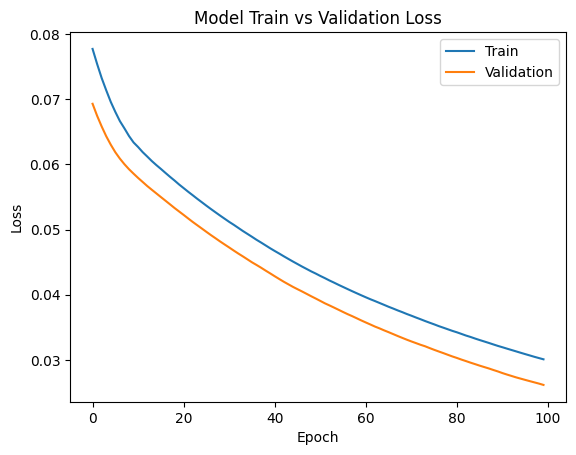

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


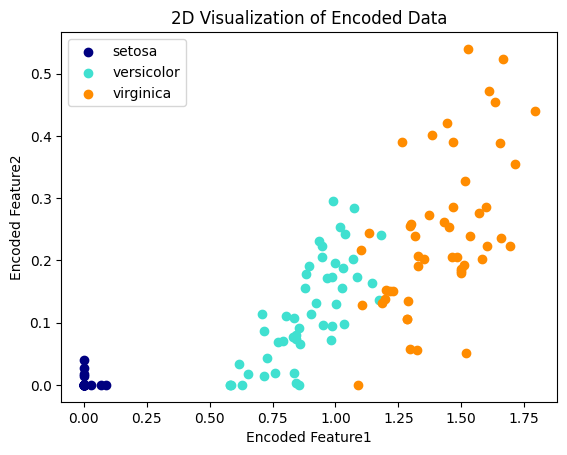

In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:", X[0])
target_names = iris.target_names

# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Function for plotting the graphs
def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=target_name)
    plt.legend(loc='upper left')
    plt.title(title)
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

# Splitting data into train and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Defining the autoencoder structure
input_dim = X_train.shape[1]
encoding_dim = 2  # Reduced dimensionality

# Input placeholder
input_layer = Input(shape=(input_dim,))

# Encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoded (lossy reconstruction) of the input
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model that maps input to reconstruction
autoencoder = Model(input_layer, decoded)

# Encoder model to extract the encoded representation
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=16,
    shuffle=True,
    validation_data=(X_test, X_test),
    verbose=0
)

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Use the encoded layer to encode the training input
encoded_X = encoder.predict(X_scaled)

# Visualizing the encoded 2D representation
plot3clusters(encoded_X, "2D Visualization of Encoded Data", "Encoded Feature")